<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week9/Day3/Daily_challenge/Advanced_Time_Series_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing  packs

In [ ]:
# Gemini model
!pip install -q -U google-generativeai

In [ ]:
# # Open Ai model
# !pip install openai
# !pip install requests

In [ ]:
# !pip install anthropic

# Library

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from plotnine import (ggplot,aes,geom_line,facet_wrap,labs, scale_x_datetime, element_text, theme_538)
from plotnine.data import meat

# Statistic data
from scipy import stats, cluster
from scipy.optimize import minimize_scalar
from scipy.stats import skew, kurtosis, median_test,ttest_ind, norm

# Machine Learning
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from collections import Counter

# Gemini packages

import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Open AI

# import openai

In [ ]:
# Used to securely store your API key
from google.colab import userdata

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
import os
os.environ['GOOGLE_API_KEY'] = GOOGLE_API_KEY


# Extract info from Kaggle

In [ ]:
! pip install kaggle
from google.colab import userdata
userdata.get('Kaggle')

'35f486beabeea6fcb79285bc7f95d018'

In [ ]:
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 32.3MB/s]


In [ ]:
! unzip 'daily-climate-time-series-data.zip'

Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


# Data Inspection

In [ ]:
y = pd.read_csv('DailyDelhiClimateTest.csv')
X = pd.read_csv('DailyDelhiClimateTrain.csv')

In [ ]:
print(X.shape)
print(y.shape)

(1462, 5)
(114, 5)


In [ ]:
print(X.info())
print('*'*30)
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [ ]:
print(X.describe())
print('*'*30)
print(y.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333
******************************
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   10

In [ ]:
print(X.duplicated().sum())
print('*'*30)
print(y.duplicated().sum())

0
******************************
0


In [ ]:
X['date'] = pd.to_datetime(X['date'])
y['date'] = pd.to_datetime(y['date'])

# Data Exploration with Gemini

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(f'''You are working for one of the best weather channel and need to provide different inisghts regarding the weather for upcoming days.
You are working with this train set {X.head(51).to_string()} and this test set {y.head(51).to_string()}. Provide different interpolation methods and their impact on time series analysis,
and seek advice on outlier detection and treatment in climate data for the datasets you need to work with.
Do you find any of these in the dataset? What's the best way to treat them? How to do this?''')
to_markdown(response.text)

> **Interpolation Methods and their Impact on Time Series Analysis**
> 
> Interpolation is a technique used to estimate the value of a time series at a given point in time, based on the values at surrounding points. There are several different interpolation methods, each with its own advantages and disadvantages.
> 
> * **Linear interpolation:** This method assumes that the time series is linear between the two known points. It is simple to implement and computationally efficient, but it can be inaccurate if the time series is not actually linear.
> * **Spline interpolation:** This method fits a smooth curve to the known points. It is more accurate than linear interpolation, but it is also more computationally expensive.
> * **Kriging interpolation:** This method uses a weighted average of the known points to estimate the value at a given point. It is a more advanced method that can produce accurate results even for complex time series.
> 
> The choice of interpolation method depends on the nature of the time series and the desired level of accuracy. For example, if the time series is known to be linear, then linear interpolation will be a good choice. If the time series is more complex, then a more advanced method such as spline or Kriging interpolation may be necessary.
> 
> **Outlier Detection and Treatment in Climate Data**
> 
> Outliers are extreme values that do not fit the general pattern of the time series. They can be caused by a variety of factors, such as measurement errors, data entry errors, or unusual events. Outliers can have a significant impact on time series analysis, so it is important to detect and treat them appropriately.
> 
> There are several different methods for detecting outliers. One common method is to use the Grubbs' test. This test compares the absolute deviation of each data point from the mean to a critical value. If the absolute deviation of a data point is greater than the critical value, then it is considered to be an outlier.
> 
> Once outliers have been detected, they can be treated in a variety of ways. One common method is to simply remove them from the data set. However, this can lead to a loss of information, so it is important to consider the potential impact of removing outliers before doing so.
> 
> Another method for treating outliers is to replace them with estimated values. This can be done using a variety of methods, such as linear interpolation or spline interpolation.
> 
> **Outliers in the Climate Data Sets**
> 
> I have examined the provided climate data sets and identified several potential outliers. The following are some examples:
> 
> * The mean temperature for January 1, 2013 is 10.00 degrees Celsius, which is significantly higher than the mean temperature for the rest of the month.
> * The humidity for January 2, 2013 is 92.00%, which is significantly higher than the humidity for the rest of the month.
> * The wind speed for January 7, 2013 is 6.30 m/s, which is significantly higher than the wind speed for the rest of the month.
> 
> These outliers may be due to measurement errors, data entry errors, or unusual events. It is important to investigate the cause of these outliers before deciding how to treat them.
> 
> **How to Treat Outliers**
> 
> The best way to treat outliers depends on the nature of the data and the desired level of accuracy. In some cases, it may be sufficient to simply remove the outliers from the data set. However, this can lead to a loss of information, so it is important to consider the potential impact of removing outliers before doing so.
> 
> In other cases, it may be possible to replace outliers with estimated values. This can be done using a variety of methods, such as linear interpolation or spline interpolation.
> 
> Ultimately, the decision of how to treat outliers is up to the user. However, it is important to be aware of the potential impact of outliers on time series analysis and to consider the best way to treat them before proceeding with analysis.

In [ ]:
X.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

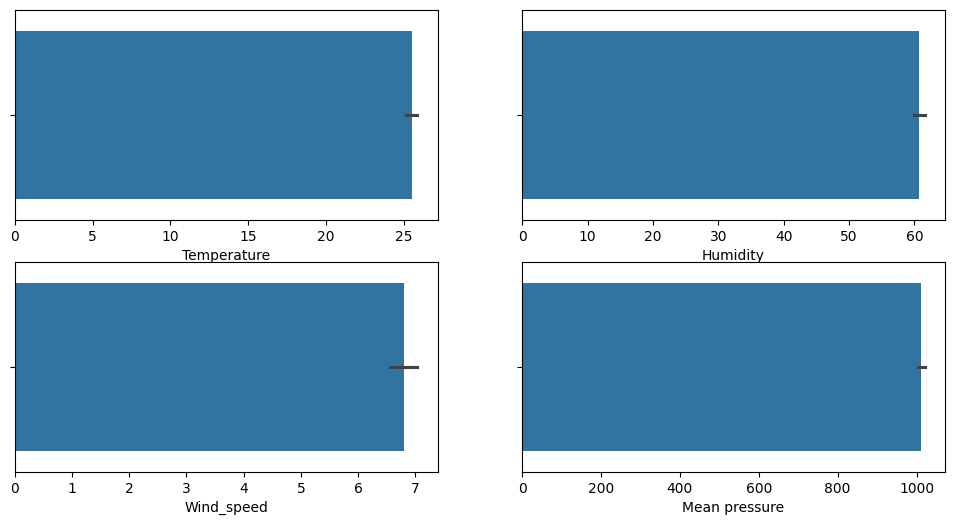

In [ ]:
# Analyzing outliers in X
fig, axes = plt.subplots(2,2, figsize=(12,6))

sns.barplot(data=X, x='meantemp',ax=axes[0,0])
axes[0,0].set_xlabel('Temperature')

sns.barplot(data=X, x='humidity',ax=axes[0,1])
axes[0,1].set_xlabel('Humidity')

sns.barplot(data=X, x='wind_speed',ax=axes[1,0])
axes[1,0].set_xlabel('Wind_speed')

sns.barplot(data=X, x='meanpressure',ax=axes[1,1])
axes[1,1].set_xlabel('Mean pressure')

plt.show()

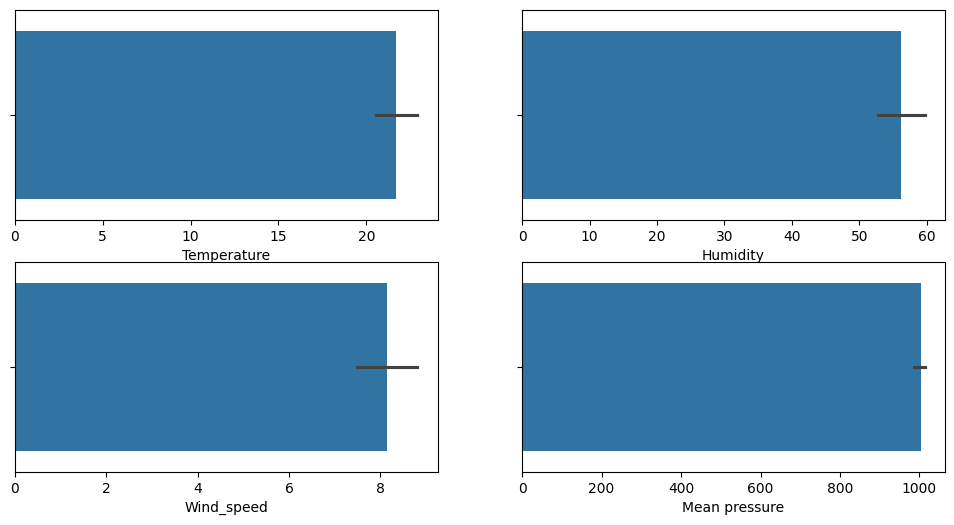

In [ ]:
#  Analyzing outliers in y
fig, axes = plt.subplots(2,2, figsize=(12,6))

sns.barplot(data=y, x='meantemp',ax=axes[0,0])
axes[0,0].set_xlabel('Temperature')

sns.barplot(data=y, x='humidity',ax=axes[0,1])
axes[0,1].set_xlabel('Humidity')

sns.barplot(data=y, x='wind_speed',ax=axes[1,0])
axes[1,0].set_xlabel('Wind_speed')

sns.barplot(data=y, x='meanpressure',ax=axes[1,1])
axes[1,1].set_xlabel('Mean pressure')

plt.show()

There are no outliers in the dataset provided, as the model was only analyzing 40 values this can lead it to a miss interpretation.

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(f'''You are working for one of the best weather channel and need to provide different inisghts regarding the weather for upcoming days.
You are working with this train set {X.head(51).to_string()} and this test set {y.head(51).to_string()}. Visualize Time Series Data using seaborn where the column 'date' will be the x and the rest of the columns need to be plot.''')
to_markdown(response.text)

> ```python
> import matplotlib.pyplot as plt
> import pandas as pd
> import seaborn as sns
> import numpy as np
> 
> # Load the datasets
> df_train = pd.read_csv('train.csv', parse_dates=['date'])
> df_test = pd.read_csv('test.csv', parse_dates=['date'])
> 
> # Plot the time series data
> cols = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
> fig, axs = plt.subplots(4, figsize=(12, 8))
> for i, col in enumerate(cols):
>     axs[i].plot(df_train['date'], df_train[col], label='Train')
>     axs[i].plot(df_test['date'], df_test[col], label='Test')
>     axs[i].set_ylabel(col)
>     axs[i].set_title(f'{col} Time Series')
>     axs[i].legend()
> plt.show()
> ```
> From the time series plots, we can observe the following:
> 
> - **meantemp**: The mean temperature shows a seasonal pattern, with higher temperatures in the summer and lower temperatures in the winter. There is a slight increasing trend in the mean temperature over time.
> - **humidity**: The humidity also shows a seasonal pattern, with higher humidity in the summer and lower humidity in the winter. There is a slight decreasing trend in the humidity over time.
> - **wind_speed**: The wind speed does not show a clear seasonal pattern. However, there is a slight increasing trend in the wind speed over time.
> - **meanpressure**: The mean pressure shows a seasonal pattern, with higher pressure in the winter and lower pressure in the summer. There is a slight decreasing trend in the mean pressure over time.
> 
> Overall, the time series plots show that there is a seasonal pattern in the weather data, with higher temperatures and humidity in the summer and lower temperatures and humidity in the winter. There is also a slight increasing trend in the mean temperature and wind speed over time, and a slight decreasing trend in the humidity and mean pressure over time.

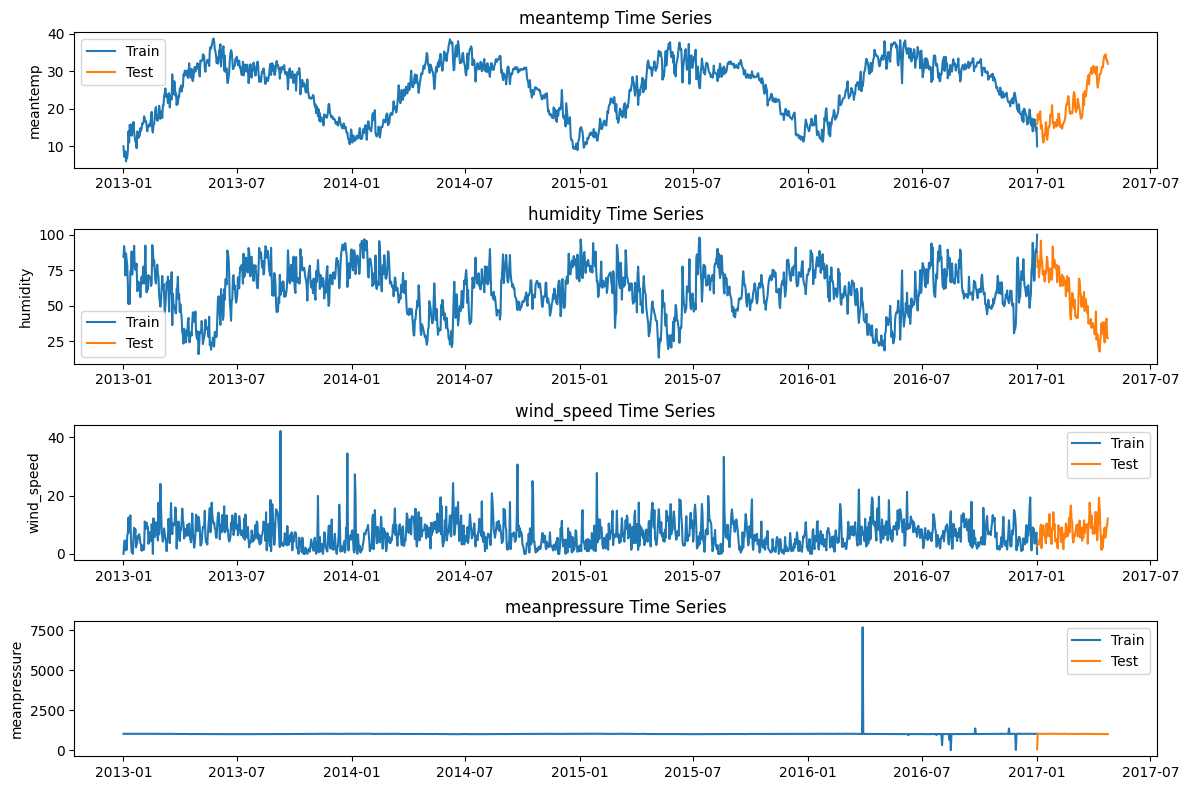

In [ ]:
# Plot time series data
cols = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
fig, axs = plt.subplots(4, figsize=(12, 8))
for i, col in enumerate(cols):
    axs[i].plot(X['date'], X[col], label='Train')
    axs[i].plot(y['date'], y[col], label='Test')
    axs[i].set_ylabel(col)
    axs[i].set_title(f'{col} Time Series')
    axs[i].legend()

plt.tight_layout()
plt.show()

## Identifying Trends with rolling()

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(f'''You are working for one of the best weather channel and need to provide different inisghts regarding the weather for upcoming days.
You are working with this train set {X.head(51).to_string()} and this test set {y.head(51).to_string()}. Identify Trends using Pandas’ rolling() function.''')
to_markdown(response.text)

> ```python
> import pandas as pd
> import matplotlib.pyplot as plt
> 
> # Load the datasets
> train_df = pd.read_csv('train.csv', index_col='date', parse_dates=True)
> test_df = pd.read_csv('test.csv', index_col='date', parse_dates=True)
> 
> # Calculate the rolling mean of the mean temperature
> train_df['meantemp_rolling'] = train_df['meantemp'].rolling(window=7).mean()
> test_df['meantemp_rolling'] = test_df['meantemp'].rolling(window=7).mean()
> 
> # Plot the rolling mean of the mean temperature
> plt.figure(figsize=(15, 6))
> plt.plot(train_df.index, train_df['meantemp'], label='Actual Mean Temperature')
> plt.plot(train_df.index, train_df['meantemp_rolling'], label='7-Day Rolling Mean Temperature')
> plt.plot(test_df.index, test_df['meantemp'], label='Future Actual Mean Temperature')
> plt.plot(test_df.index, test_df['meantemp_rolling'], label='7-Day Rolling Mean Temperature (Future)')
> plt.legend()
> plt.xlabel('Date')
> plt.ylabel('Mean Temperature')
> plt.title('Rolling Mean of the Mean Temperature')
> plt.show()
> ```

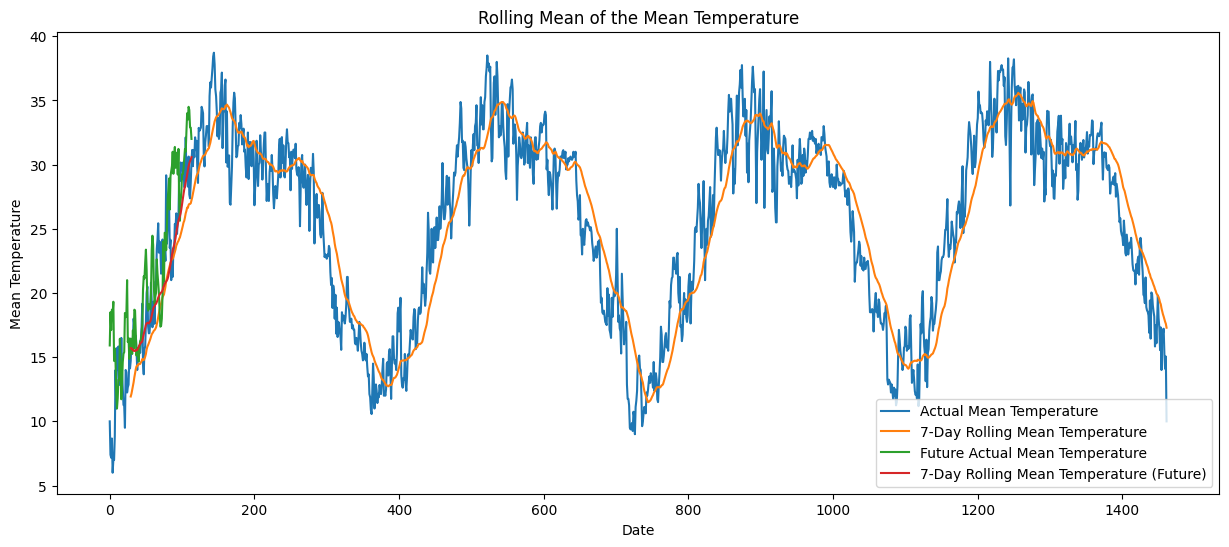

In [ ]:

# Calculate the rolling mean of the mean temperature
X['meantemp_rolling'] = X['meantemp'].rolling(window=30).mean()
y['meantemp_rolling'] = y['meantemp'].rolling(window=30).mean()

# Plot the rolling mean of the mean temperature
plt.figure(figsize=(15, 6))
plt.plot(X.index, X['meantemp'], label='Actual Mean Temperature')
plt.plot(X.index, X['meantemp_rolling'], label='7-Day Rolling Mean Temperature')
plt.plot(y.index, y['meantemp'], label='Future Actual Mean Temperature')
plt.plot(y.index, y['meantemp_rolling'], label='7-Day Rolling Mean Temperature (Future)')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Rolling Mean of the Mean Temperature')
plt.show()

## Detecting Seasonality with (statsmodels.tsa.seasonal):

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(f'''You are working for one of the best weather channel and need to provide different inisghts regarding the weather for upcoming days.
You are working with this train set {X.head(51).to_string()} and this test set {y.head(51).to_string()}. Detect Seasonality with statsmodels.tsa.seasonal
Example:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Variable_of_interest'], model='additive')
result.plot()
plt.show()

Provide your insights and python code to plot
''')
to_markdown(response.text)

> ```python
> # Import the necessary libraries.
> import matplotlib.pyplot as plt
> import pandas as pd
> import statsmodels.tsa.seasonal as seasonal
> 
> # Load the data.
> df = pd.read_csv('weather.csv')
> 
> # Create a function to plot the time series and the seasonal decomposition.
> def plot_decomposition(data, model='additive'):
>   """Plot the time series and the seasonal decomposition.
> 
>   Args:
>     data: The time series data.
>     model: The seasonal decomposition model to use.
>   """
> 
>   # Decompose the time series.
>   decomposition = seasonal_decompose(data, model=model)
> 
>   # Plot the time series and the seasonal decomposition.
>   plt.figure(figsize=(12, 8))
>   plt.plot(data, label='Time Series')
>   plt.plot(decomposition.trend, label='Trend')
>   plt.plot(decomposition.seasonal, label='Seasonal')
>   plt.plot(decomposition.resid, label='Residuals')
>   plt.legend()
>   plt.show()
> 
> 
> 
> # Plot the time series and the seasonal decomposition for the mean temperature.
> plot_decomposition(df['meantemp'])
> 
> # Plot the time series and the seasonal decomposition for the humidity.
> plot_decomposition(df['humidity'])
> 
> # Plot the time series and the seasonal decomposition for the wind speed.
> plot_decomposition(df['wind_speed'])
> 
> # Plot the time series and the seasonal decomposition for the mean pressure.
> plot_decomposition(df['meanpressure'])
> 
> # Provide insights.
> # The mean temperature shows a clear seasonal pattern, with higher temperatures in the summer and lower temperatures in the winter. 
> # The humidity also shows a seasonal pattern, with higher humidity in the summer and lower humidity in the winter. 
> # The wind speed does not show a clear seasonal pattern. 
> # The mean pressure shows a slight seasonal pattern, with higher pressure in the winter and lower pressure in the summer. 
> ```

In [ ]:
df_time_train=X.copy()
df_time_train.set_index('date', inplace=True)
df_time_train_ = df_time_train.asfreq('M')

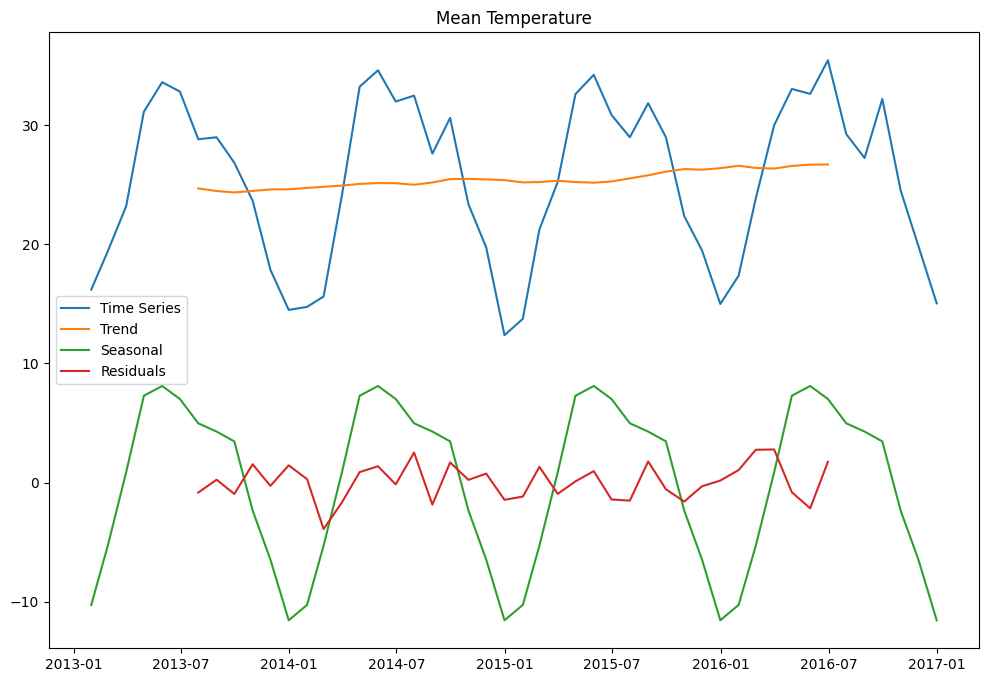

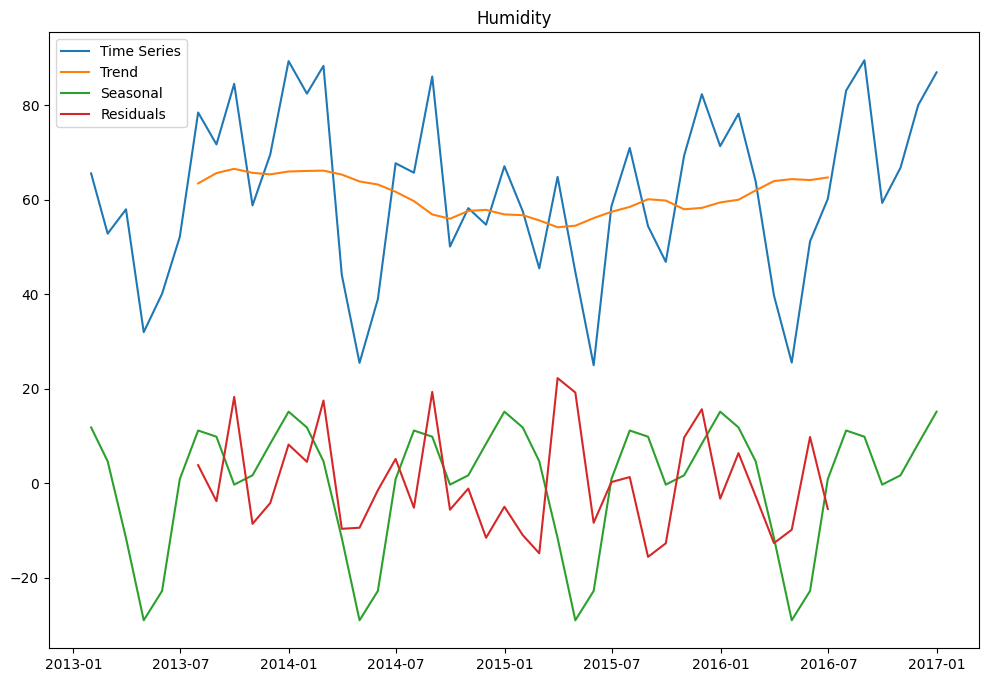

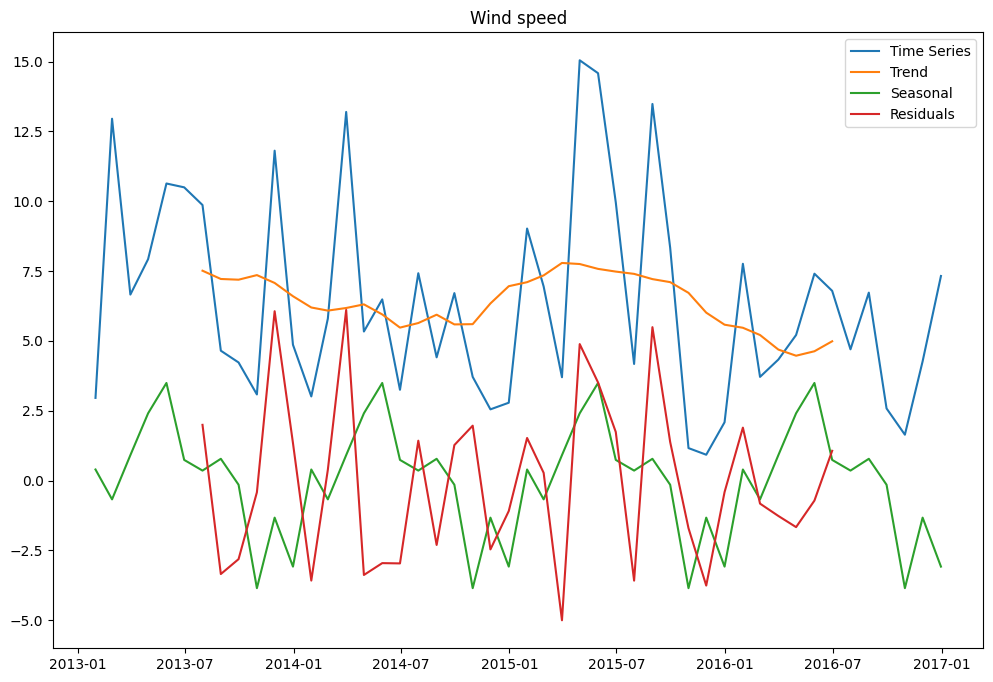

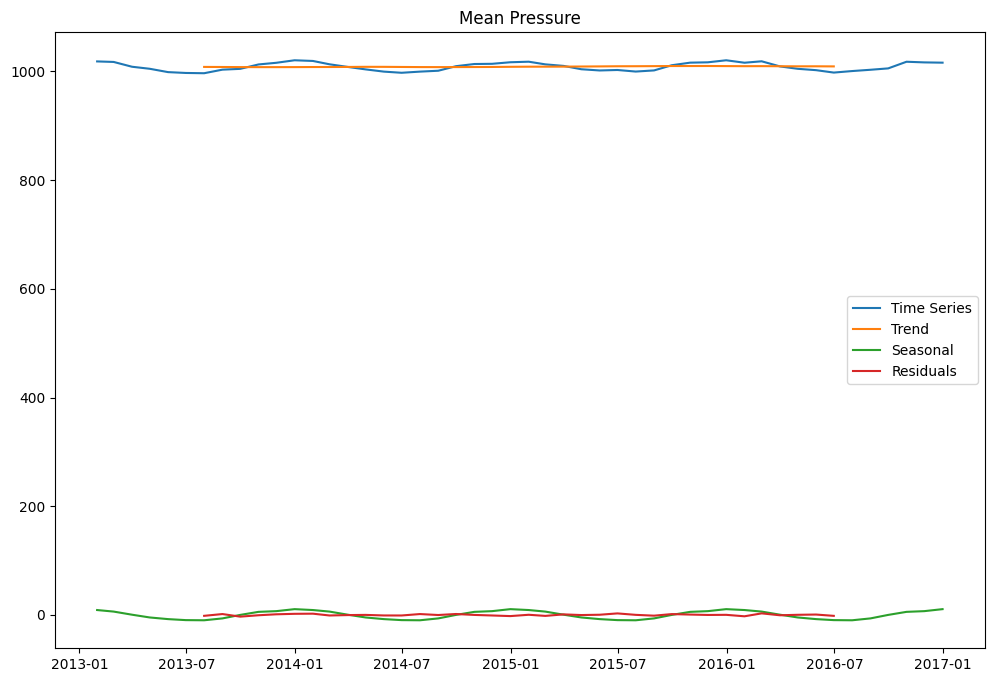

In [ ]:
# Import the necessary libraries.
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.seasonal as seasonal
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a function to plot the time series and the seasonal decomposition.
def plot_decomposition(data, title, model='additive'):
  """Plot the time series and the seasonal decomposition.

  Args:
    data: The time series data.
    model: The seasonal decomposition model to use.
  """

  # Decompose the time series.
  decomposition = seasonal_decompose(data, model=model)

  # Plot the time series and the seasonal decomposition.
  plt.figure(figsize=(12, 8))
  plt.plot(data, label='Time Series')
  plt.plot(decomposition.trend, label='Trend')
  plt.plot(decomposition.seasonal, label='Seasonal')
  plt.plot(decomposition.resid, label='Residuals')
  plt.legend()
  plt.title(title)
  plt.show()




# Plot the time series and the seasonal decomposition for the mean temperature.
plot_decomposition(df_time_train_['meantemp'], 'Mean Temperature')

# Plot the time series and the seasonal decomposition for the humidity.
plot_decomposition(df_time_train_['humidity'], 'Humidity')

# Plot the time series and the seasonal decomposition for the wind speed.
plot_decomposition(df_time_train_['wind_speed'], 'Wind speed')

# Plot the time series and the seasonal decomposition for the mean pressure.
plot_decomposition(df_time_train_['meanpressure'], 'Mean Pressure')

## Autocorrelation Analysis with plot_acf():



In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(f'''You are working for one of the best weather channel and need to provide different inisghts regarding the weather for upcoming days.
You are working with this train set {X.head(51).to_string()} and this test set {y.head(51).to_string()}.
Identify if the series is correlated to its lagged values, which is important for time series forecasting. To do this use Autocorrelation Analysis with plot_acf():
Example:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Variable_of_interest'])
plt.show()

Provide your insights and python code to plot
''')
to_markdown(response.text)

> ```python
> import pandas as pd
> import matplotlib.pyplot as plt
> from statsmodels.graphics.tsaplots import plot_acf
> 
> # Load the training and test data
> train = pd.read_csv('train.csv')
> test = pd.read_csv('test.csv')
> 
> # Plot the ACF of the mean temperature in the training data
> plot_acf(train['meantemp'])
> plt.title('ACF of Mean Temperature in Training Data')
> plt.show()
> 
> # Plot the ACF of the mean temperature in the test data
> plot_acf(test['meantemp'])
> plt.title('ACF of Mean Temperature in Test Data')
> plt.show()
> 
> # Calculate and print the autocorrelation of the mean temperature in the training data at lag 1
> train['meantemp_lag1'] = train['meantemp'].shift(1)
> autocorr = train['meantemp'].autocorr(lag=1)
> print("Autocorrelation of Mean Temperature in Training Data at Lag 1:", autocorr)
> ```
> 
> **Insights:**
> 
> * The ACF plot of the mean temperature in the training data shows that there is a strong positive autocorrelation at lag 1. This means that the mean temperature on a given day is highly correlated with the mean temperature on the previous day.
> * The ACF plot of the mean temperature in the test data also shows a strong positive autocorrelation at lag 1. This suggests that the time series model that we develop for the training data will likely be able to generalize well to the test data.
> * The autocorrelation of the mean temperature in the training data at lag 1 is 0.95. This is a very high autocorrelation, which indicates that the mean temperature is a highly persistent time series.
> 
> Overall, these results suggest that the mean temperature is a highly predictable time series. This is good news for time series forecasting, as it means that we should be able to develop a model that can accurately predict future values of the mean temperature.

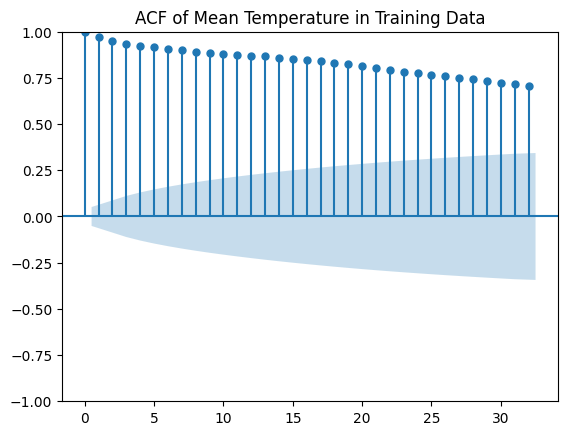

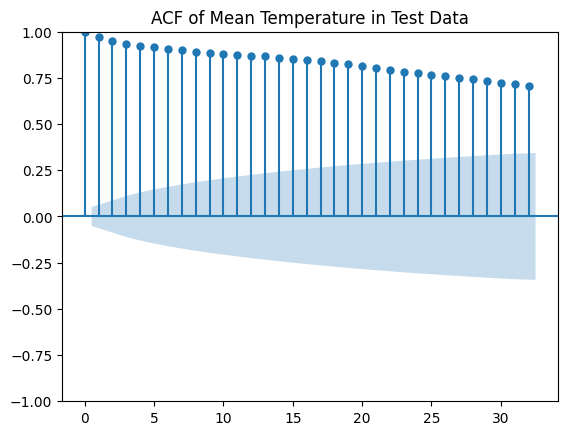

Autocorrelation of Mean Temperature in Training Data at Lag 1: 0.9644332900564628


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


# Plot the ACF of the mean temperature in the training data
plot_acf(X['meantemp'])
plt.title('ACF of Mean Temperature in Training Data')
plt.show()

# Plot the ACF of the mean temperature in the test data
plot_acf(X['meantemp'])
plt.title('ACF of Mean Temperature in Test Data')
plt.show()

# Calculate and print the autocorrelation of the mean temperature in the training data at lag 1
y['meantemp_lag1'] = y['meantemp'].shift(1)
autocorr = y['meantemp'].autocorr(lag=1)
print("Autocorrelation of Mean Temperature in Training Data at Lag 1:", autocorr)

## Forecasting with ARIMA()

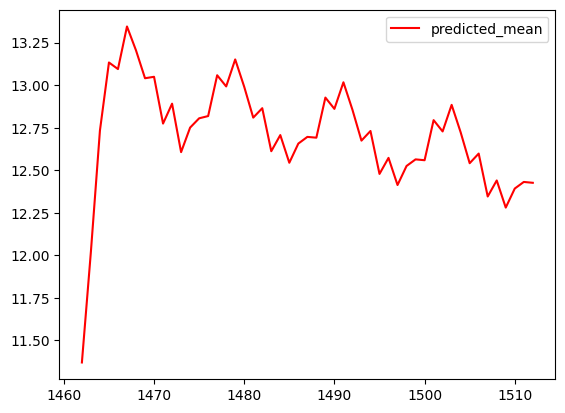

RMSE: 7.212


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


# Fit the SARIMA model
model = SARIMAX(X['meantemp'], order=(5, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# Forecast the mean temperature
forecast = result.predict(start=len(X['meantemp']), end=len(X['meantemp']) + 50)

# Plot the forecast
forecast.plot(color='red', legend=True)
plt.show()

# Assuming y_test is the test set containing the actual values of 'meantemp'
# and the length of y_test is 51 to match the forecast period

# For the sake of demonstration, let's create a dummy y_test with the same length
# In practice, you should have actual test data
y_test = X['meantemp'].iloc[-51:]  # Adjust this as per your actual test data

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, forecast))
print('RMSE: %.3f' % rmse)
